# Multi-Agent Debate Decision Advisor
## Full Demo Notebook

This notebook walks through:
- Graph visualization
- Running the debate pipeline (Supporter → Critic → Judge)
- Inspecting tool outputs
- Viewing final verdicts


#### Graph Structure

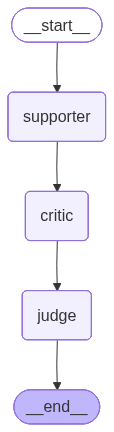

In [19]:
from graph import build_graph, run_debate

# Build graph
graph = build_graph()
graph

#### Claim


In [20]:
claim = "Blockchain will transform industry"
print("Claim :", claim)

# AI replacing human jobs
# Democracy is the best form of government
# Space exploration is worth the cost
# Genetic engineering is ethical
# Remote work increases productivity
# Gun control reduces crime

Claim : Blockchain will transform industry


#### Run a Debate on a Sample Claim

In [21]:
from state.debateState import initialize_state

# Initialize debate state for the given claim
state = initialize_state(claim)

# Run the debate pipeline
final_state = graph.invoke(state)


#### Supporter Output


In [22]:
import json
print("Supporter Output")
print(json.dumps(final_state["supporter_output"], indent=2))

Supporter Output
{
  "pros": [
    {
      "short_title": "Enhanced Transparency",
      "argument_text": "Blockchain technology provides a transparent record of transactions that is immutable and accessible to all parties involved. This transparency can significantly reduce fraud and unauthorized activities, particularly in industries like finance and healthcare where data integrity is crucial.",
      "supporting_evidence": "Transaction histories are becoming more transparent through the use of blockchain technology, especially in sectors like financial services and healthcare, which are critical for protecting sensitive data.",
      "evidence_strength": "strong",
      "confidence": 90
    },
    {
      "short_title": "Increased Efficiency",
      "argument_text": "By automating and streamlining processes, blockchain can enhance operational efficiency across various industries. This leads to faster transaction times and reduced costs, making businesses more competitive and respons

#### Critic's Output

In [23]:
print("\nCritic Output")
print(json.dumps(final_state["critic_output"], indent=2))


Critic Output
{
  "cons": [
    {
      "short_title": "Overstated Transparency Benefits",
      "counter_text": "While blockchain does provide a transparent record of transactions, this transparency is only beneficial if all parties involved are willing to engage with the technology. Many industries have legacy systems that may not integrate well with blockchain, leading to incomplete transparency and potential data silos.",
      "counter_evidence": "No retrieved evidence available.",
      "evidence_strength": "weak",
      "confidence": 70
    },
    {
      "short_title": "Efficiency Gains Are Not Guaranteed",
      "counter_text": "The claim that blockchain will universally enhance efficiency overlooks the complexity of implementation. Transitioning to blockchain can involve significant costs and time, and in some cases, it may not lead to faster transaction times compared to existing systems, especially if the network is not widely adopted.",
      "counter_evidence": "No retri

### Judge's Verdict

In [24]:
print("\nJUDGE VERDICT")
print(json.dumps(final_state["final_verdict"], indent=2))


JUDGE VERDICT
{
  "verdict_pros": [
    {
      "title": "Enhanced Transparency",
      "summary": "Blockchain technology provides a transparent record of transactions that is immutable and accessible to all parties involved, significantly reducing fraud and unauthorized activities.",
      "reliability": 90,
      "matched_rules": [
        "R1",
        "R2"
      ]
    },
    {
      "title": "Improved Data Security",
      "summary": "Blockchain's decentralized nature enhances security by making it difficult for unauthorized parties to alter or access sensitive information, particularly in sectors like healthcare.",
      "reliability": 90,
      "matched_rules": [
        "R1",
        "R2"
      ]
    },
    {
      "title": "Revolutionizing Supply Chains",
      "summary": "Blockchain technology can transform supply chain management by providing a transparent and traceable record of goods, enhancing efficiency and consumer trust.",
      "reliability": 85,
      "matched_rules"

#### Supporter Output (Formatted)

In [25]:
supporter = final_state["supporter_output"]

print("SUPPORTER OUTPUT")

pros = supporter.get("pros", [])
if not pros:
    print("No supporter arguments found.\n")
else:
    for idx, item in enumerate(pros, start=1):
        print(f"{idx}. {item['short_title']}")
        print(f"   {item['argument_text']}")
        print(f"   Evidence: {item['supporting_evidence']}")
        print(f"   Strength: {item['evidence_strength']}")
        print(f"   Confidence: {item['confidence']}\n")


SUPPORTER OUTPUT
1. Enhanced Transparency
   Blockchain technology provides a transparent record of transactions that is immutable and accessible to all parties involved. This transparency can significantly reduce fraud and unauthorized activities, particularly in industries like finance and healthcare where data integrity is crucial.
   Evidence: Transaction histories are becoming more transparent through the use of blockchain technology, especially in sectors like financial services and healthcare, which are critical for protecting sensitive data.
   Strength: strong
   Confidence: 90

2. Increased Efficiency
   By automating and streamlining processes, blockchain can enhance operational efficiency across various industries. This leads to faster transaction times and reduced costs, making businesses more competitive and responsive to market demands.
   Evidence: Many industry leaders have already achieved significant business benefits, including greater efficiency and speed of transa

#### Critic's Output (Formatted)

In [26]:
critic = final_state["critic_output"]

print("CRITIC OUTPUT")

cons = critic.get("cons", [])
if not cons:
    print("No critic arguments found.\n")
else:
    for idx, item in enumerate(cons, start=1):
        print(f"{idx}. {item['short_title']}")
        print(f"   {item['counter_text']}")
        print(f"   Counter Evidence: {item['counter_evidence']}")
        print(f"   Strength: {item['evidence_strength']}")
        print(f"   Confidence: {item['confidence']}\n")


CRITIC OUTPUT
1. Overstated Transparency Benefits
   While blockchain does provide a transparent record of transactions, this transparency is only beneficial if all parties involved are willing to engage with the technology. Many industries have legacy systems that may not integrate well with blockchain, leading to incomplete transparency and potential data silos.
   Counter Evidence: No retrieved evidence available.
   Strength: weak
   Confidence: 70

2. Efficiency Gains Are Not Guaranteed
   The claim that blockchain will universally enhance efficiency overlooks the complexity of implementation. Transitioning to blockchain can involve significant costs and time, and in some cases, it may not lead to faster transaction times compared to existing systems, especially if the network is not widely adopted.
   Counter Evidence: No retrieved evidence available.
   Strength: weak
   Confidence: 75

3. Security Risks Remain
   Although blockchain's decentralized nature is touted as a securit

#### Judge's Verdict (Formatted)

In [27]:
verdict = final_state["final_verdict"]

print("JUDGE VERDICT\n")

print(f"Final Recommendation: {verdict['final_recommendation']}")
print(f"Confidence: {verdict['confidence']}%\n")


print("Pros:")
for idx, pro in enumerate(verdict["verdict_pros"], start=1):
    print(f"{idx}. {pro['title']}")
    print(f"   {pro['summary']}")
    print(f"   Reliability: {pro['reliability']}")
    rules = ", ".join(pro['matched_rules']) if pro.get("matched_rules") else "None"
    print(f"   Rules: {rules}\n")


print("Cons:")
for idx, con in enumerate(verdict["verdict_cons"], start=1):
    print(f"{idx}. {con['title']}")
    print(f"   {con['summary']}")
    print(f"   Reliability: {con['reliability']}")
    rules = ", ".join(con['matched_rules']) if con.get("matched_rules") else "None"
    print(f"   Rules: {rules}\n")


f_list = verdict.get("fallacies_detected", [])
if f_list:
    # If fallacies are dicts, convert to readable text
    if isinstance(f_list[0], dict):
        fallacy_texts = [f"{f['fallacy']}: {f['description']}" for f in f_list]
        print("Fallacies Detected:")
        for f in fallacy_texts:
            print(f" - {f}")
    else:
        print("Fallacies Detected:", ", ".join(f_list))
else:
    print("Fallacies Detected: None")


print("\nExplanation:")
print(verdict["explanation"])


JUDGE VERDICT

Final Recommendation: Lean Accept
Confidence: 85%

Pros:
1. Enhanced Transparency
   Blockchain technology provides a transparent record of transactions that is immutable and accessible to all parties involved, significantly reducing fraud and unauthorized activities.
   Reliability: 90
   Rules: R1, R2

2. Improved Data Security
   Blockchain's decentralized nature enhances security by making it difficult for unauthorized parties to alter or access sensitive information, particularly in sectors like healthcare.
   Reliability: 90
   Rules: R1, R2

3. Revolutionizing Supply Chains
   Blockchain technology can transform supply chain management by providing a transparent and traceable record of goods, enhancing efficiency and consumer trust.
   Reliability: 85
   Rules: R1, R2

Cons:
1. Overstated Transparency Benefits
   The transparency benefits of blockchain are contingent on the willingness of all parties to engage with the technology, which may not be the case in indu